In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import t
%matplotlib inline

In [2]:
df = pd.read_csv('./stroopdata.csv')

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

 
**My test results:**

Congruent words - 10.843

Incongruent words - 23.246


**1. What is our independent variable? What is our dependent variable?**
Independent variable - The word/colour combination.
Dependent variable is - The time it takes to name the ink colour.
 
 
**2. What is an appropriate set of hypotheses for this task?** 
 
*Null Hypothesis*, H0 - It will take the same amount of time to identify colours in words that are coloured differently to their names as words whose names match the colors in which they are printed. 
H0: μi ≤ μc
*Alternate Hypothesis*, HA - It will take longer to identify colours where the words displayed have names that do not match the colours in which they are printed. 
HA: μi > μc 
μi - population mean of incongruent values
μc - population mean of congruent values
 
 
**What kind of statistical test do you expect to perform?**
 
I will perform a repeated measures right tailed t-test. This will show if the mean time of recognising colour in incongruent words is statistically significantly different from recognising colour in the congruent words. Since we’re only expecting an increase in time we perform a one tailed test. I am performing a t-test rather than a z-test because the population standard deviation is unknown. A repeated measures test will be used because the data set is from one group of participants that are tested twice with two conditions, i.e. recognising colour in congruent and incongruent words. 
Typically t-tests are done with an alpha level of 0.05.
A 95% Confidence Interval will give a range where 95% of the time, the empirical mean x bar that we calculate is below the upper limit, and above the lower limit.
 

**3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.**
 
Bessel’s correction was used for calculating the standard deviation since we are estimating the populations standard deviation.
The mean and median are quite close in value which is to be expected for a normal distribution. The min and max values for the congruent words fall around two standard deviations from the mean whereas this is not the case for the incongruent words. 
 
Sample size = 24


In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [11]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


** 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots. **

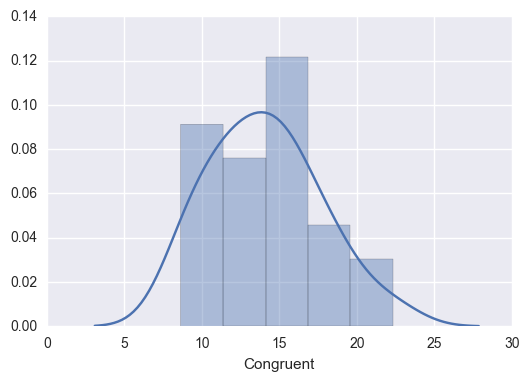

In [5]:
sns.distplot(df['Congruent'])

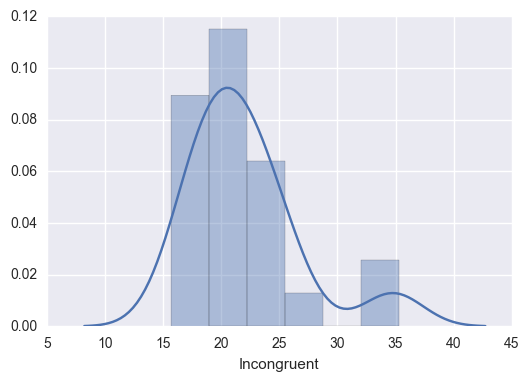

In [6]:
sns.distplot(df['Incongruent'])

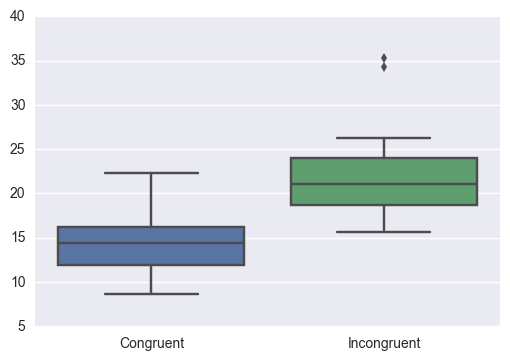

In [12]:
title = 'Box Plot of Both Conditions'
sns.boxplot(data=df)

Talk about plots

**5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?**

In [13]:
# t-critical value for a 95% confidence level and 23 degrees of freedom
t.ppf(.95, 23)

1.7138715277470473

Since we have 24 participants we will have 23 degrees of freedom (n-1). A confidence level of 95% and 23 degrees of freedom leads to a t-critical value ends up being 1.7139. Note: this could have also been acheived using a t table. 

In [14]:
df['Difference'] = df['Congruent'] - df['Incongruent']
df['Difference'].std(axis=0)

4.8648269103590556

We can now calculate our t statistic:

In [15]:
# t-statistic
7.97/(4.8648 / math.sqrt(24))

8.025996238275749

Since the t-statistic, 8.02, is greater than the critical value, 1.7139, we can reject the null hypothesis. 
Therefore there is a statistically significant differnce in the time taken to recognise a colour in congruent and incongruent words. 

**6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!**

I believe it's quicker for our brain to read a word rather than stop and consider what colour we are seeing. When the word name and colour match up it's relatively quick and easy for us to say the colour. However, when the word name and colour don't match up we have to take our time to correct ourselves and say the actual colour printed rather than the word we are reading.   

I think a similar effect would be seen if a participant had to identify an incorrectly spelled word from a list of words. Often our brain can correct for minor mistakes in spellings without much notice so it would take more time to recognise incorrectly spelled words. 